# Lab 5
## Erdős-Rényi giant component tipping point (cont.) and random walks

#### __Theorem__: 

* If $n\cdot p =c$, where $c<1$, (i.e. $p < \frac{1}{n}$) then G(n, p) will (asymptotically) almost surely have __no connected components__ of size __larger than $O(\log(n))$__.
* If $n\cdot p = 1$, (i.e. $p = \frac{1}{n}$) then G(n, p) will (asymptotically) almost surely have a __largest component__ whose size is of order __$n^{2/3}$__.
* If $n\cdot p \rightarrow c > 1$, (i.e. $p > \frac{1}{n}$) where c is a constant, then G(n, p) will (asymptotically) almost surely have a __unique giant component__ containing a positive fraction of the vertices. No other component will contain more than O(log(n)) vertices.

#### Meaning of the theorem: 

If we investigate how the size of the largest connected component changes as we increase $p$ in the $G(n, p)$ Erdős-Rényi random graph, we should see that the size of the component immediately increases around $p=\frac{1}{n}$. ($\log n << n^{2/3} << n$) 

### **Goal**

Goal of this lab is to check the claims of the theorem. Namely, to investigate the (average) size of the largest connected component around $p=1/n$, i.e. when 
1. $p$ is slightly smaller than $1/n$,
2. $p$ equals to $1/n$,
3. $p$ is slightly greater than $1/n$

----

In [48]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pydot 
import pandas as pd

# Solution of Exercise 4 of __Lab 4__ 

In order to be able to investigate the size of the lagerst connected component, we need a function that returns the largest connected component of a graph.

1. Implement a function, which takes a networkx graph as an input, and returns its largest connected component. <br>
__Hint__: Use (and take a look at the examples of) the [nx.connected_components](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components) and [Graph.subgrpah](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) functions. 
2. Test your function on an Erdős-Rényi random graph! 
    1. Generate an Erdős-Rényi graph with ```n=50``` and ```p=1/50``` parameters. Use the [nx.fast_gnp_random_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) function, and save it in a variable.
    2. For a nice drawing of the graph, calculate the positions of the vertices with the [nx.drawing.nx_pydot.graphviz_layout](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pydot.graphviz_layout.html?highlight=drawing%20nx_pydot%20graphviz_layout#networkx.drawing.nx_pydot.graphviz_layout) function, and save it in a variable.
    3. Draw your graph with the usual [nx.draw](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function (set its ```pos``` parameter to the previously calculated positions)
        * If pydot is not installed, then open anaconda prompt or the terminal and run the following: `conda install -c anaconda pydot`, or use another [graph layout](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout), e.g.`kamada_kawai`. 
    4. Now let's highlight the largest connected component of the generated graph. You can do it by highlighting the edges of the largest connected component with the [nx.draw_networkx_edges](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges) function.
    The ```edge_color``` parameter of this function sets the color of the edges, and ```width``` sets the width of the edges. Set its color to red, and its width to 3. 
       

In [5]:
def largest_connected_comp(graph):
    '''Returns the largest connected component of a graph'''
    
    # Get the nodes of the largest connected component:
    nodes_of_lcc =  max(nx.connected_components(graph), key=len)
    
    # Return the largest component:
    return graph.subgraph(nodes_of_lcc)

In [10]:
graph = nx.fast_gnp_random_graph(50, 1/50)

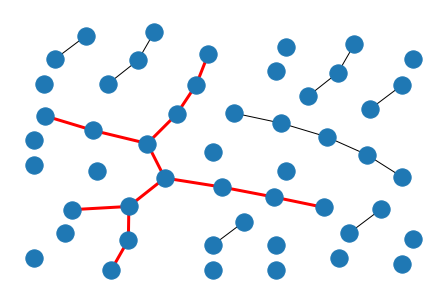

In [11]:
pos = nx.drawing.nx_pydot.graphviz_layout(graph)
nx.draw(graph, pos)
nx.draw_networkx_edges(largest_connected_comp(graph), pos, edge_color='r', width=3)
plt.show()

### Now let's investigate the size of the largest connected component in G(n, p), around p=1/n

## Let $p=  \frac{1+\varepsilon}{n}$

### __How to choose $\varepsilon$, to be able to see the phase transitions?__

If $n$ is large and
1. If $\varepsilon <0$, then $p < \frac{1}{n}$ and the size of the largest connected component is $O(\log n)$. 
2. If $\varepsilon = 0$, then  $p = \frac{1}{n}$, and the size of the largest component is $O(n^{2/3})$
3. If $\varepsilon > 0$, but small, then  $p > \frac{1}{n}$ and we have a giant component of size $2\varepsilon n$.

From the second and the third statement, we want choose an $\varepsilon$ such that $n^{2/3} << 2 \varepsilon n$ to be able to see the phase transition.
$$n^{2/3} <<  \varepsilon n$$
$$\frac{n^{2/3}}{n} << \varepsilon$$
$$n^{-1/3} << \varepsilon $$

Furthermore we also want $1-\varepsilon >0$

__Example:__

Let $n=10000$, then $\frac{1}{n} = 0.0001$. We want $\varepsilon >> n^{-1/3} \approx 0.046  $, so we look for $\varepsilon$ in the form $\lambda \cdot n^{-1/3} $. On the other hand we also want $1-\varepsilon> 0$

$$1- \varepsilon = 1 - \lambda \cdot n^{-1/3}   > 0 $$ 
$$\frac{1}{n^{-1/3}} > \lambda $$
$$\lambda < n^{1/3} \approx 21.5$$
So we have two constraints on $\lambda$:
1. $\lambda < n^{1/3} \approx 21.5$
2. $ \varepsilon >> n^{-1/3} \Longrightarrow \lambda n^{-1/3} >> n^{-1/3} \Longrightarrow \lambda >> 1$
So in this example $\lambda = 10$ could be a good choice. <br>
Generally, we can chose something which is between $1$ and $ n^{1/3} $, e.g.:
$$\lambda = \frac{1+n^{1/3} }{2} $$

# __Exercise 2__

(Exercise 5 of Lab 4)

Create the following variables:
* ```n```: number of nodes. Set it to ```200```
* ```lamb```: the $\lambda$ parameter. Set it to $\frac{1+n^{1/3} }{2} $
* ```epsilon```: the $\varepsilon$ parameter. Set it to $\lambda \cdot n^{-1/3} $

Now you are going to create a figure, that consists of 4 subfigures. All the four figures will show G(n, p) graphs but with different p parameters. Similarly to __Exercise 1__ we will highlight the connected components of the graphs.
* In the top left: ```p = (1-epsilon) / n``` ,
* Top right: ```p = 1 / n```,
* Bottom left: ```p = (1+epsilon) / n```
* Bottom right: ```p = log(n) / n``` (this is where the graph is expected to become connected)

Complete the code bellow! The instructions are in the comments.

In [12]:
n = 200 # number of nodes

lamb = (1+n**(1/3))/2 # lambda

epsilon = lamb * n**(-1/3) # epsilon

# p value at which giant component of size log(n) nodes is expected
p_logn = (1-epsilon)/n

#  p value at which giant component of size n^{2/3} nodes is expected
p_n23 = 1/n

#  p value at which giant component of size O(n) nodes is expected
p_n = (1+epsilon)/n

# p value at which graph is expected to become completely connected
p_conn = np.log(n) / n

# p parameters in list
pvals=[p_logn, p_n23, p_n, p_conn]

# p parameters as keys, and expected size of the largest component in values. 
# We will use it for the subtitles of the figures
size_of_largest_comp = {p_logn:'log(n)', p_n23:r'$n^{2/3}$', p_n:r'$\varepsilon n$', p_conn:'n'}

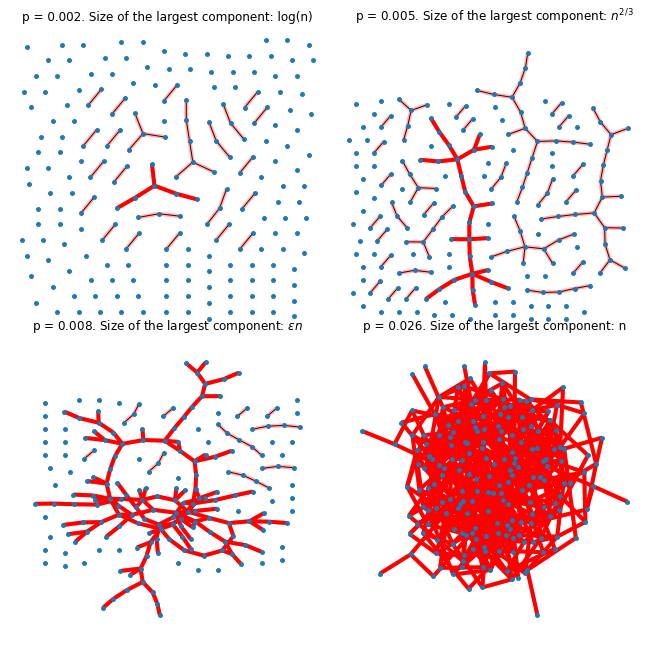

In [13]:
region = 220  # for pylab 2x2 subplot layout
# The 22 means 2x2 grid. The region of the top left figure is coded by 221, the top right 222, 
# bottom left 223, and bottom right 224.

plt.figure(figsize=(9,9)) # here we can set the size of the figure
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.02, hspace=0.01) # Tune the subplot layout.

for p in pvals:
    # Generate a G = G(n, p) Erdős-Rényi random graph:
    G = nx.fast_gnp_random_graph(n, p)
    
    # Calculate the graphviz layout of the G graph and save it in a variable:
    pos = nx.drawing.nx_pydot.graphviz_layout(G)
    
    # Position of the figure:
    region += 1
    plt.subplot(region) # From now we draw everything in the subplot encoded by 'region' = (221, 222, 223, 224) 
    
    # Title of the subplot
    plt.title(f"p = {round(p, 3)}. Size of the largest component: {size_of_largest_comp[p]}")
    
    # Draw the graph with the calclated layout, set the size of the nodes to 15. (node_size = 15)
    nx.draw(G, pos, node_size=15)
    
    # Identify connected components:
    # Create a list, which contains the connected components and save it in a 'connected_components' variable
    # Hint: use the G.subgraph and the nx.connected_components(G) functions
    connected_components = [G.subgraph(c) for c in nx.connected_components(G)]
    
    # Get the largest connected component from the connected_components list, 
    # and save it in a variable called largest_connected_component
    largest_connected_component = max(connected_components, key=len)
    
    # Highlight the largest connected component:
    # Set the colors of the edges to red, and the width of the edges to 4
    nx.draw_networkx_edges(largest_connected_component, pos, edge_color='r', width=4.0)

    # Show other connected components, but with more transparent color.
    # For each component in connected_components, draw the component's edges,
    # Set the color to red, the width to 4, and the transparency to 0.3 
    # (the alpha parameter sets the transparency). 
    for component_i in connected_components:
            # Highlight the other components. Set the color to red, width to 4, and the transparency to 0.3.
            # The alpha parameter sets the transparency of the edges
            nx.draw_networkx_edges(component_i, pos, edge_color='r', alpha=0.3, width=4.0)
plt.show()

# __Exercise 1__ 
(Exercise 4 of Lab 4)

Let ```n = 200```. Investigate the distribution of the size of the largest connected component. Create __three__ separate scatterplots with different values of p: ```(1-epsilon)/n```, ```1/n```, and ```(1+epsilon)/n```

1. For a given ```p```: create a list of length ```1000``` , which consists of the (random) number of nodes of the largest connected component of the G(n, p) graph. (Save this list in a variable)
2. Print out the expected order of size of the largest connected component together with the average size of the generated graphs (i.e. the average of the previous list). Do these two numbers have the same order of magnitude?
3. Create a scatter plot which illustrates the distribution of the list, i.e. you should use the ```Counter``` function again, and plot the frequencies against the sizes. <br> Add two vertical lines to the scatterplot (```plt.axvline```):
    1. Plot the first vertical line at the mean of the sizes, and its label should be "mean" (```label='mean'```).
    2. Plot the second vertical line at the theoretical order of size of the largest connected component. Its color should be red and its style should be dashed (```linestyle='--'```). Set its label to the theoretical order. 
    
    To show the labels, write ```plt.legend()``` before ```plt.show()```

__This should take you about 20 minutes!__


* ```n```: number of nodes. Set it to ```200```
* ```lamb```: the $\lambda$ parameter. Set it to $\frac{1+n^{1/3} }{2} $
* ```epsilon```: the $\varepsilon$ parameter. Set it to $\lambda \cdot n^{-1/3} $


In [3]:
n=200

In [4]:
lamb = (1+n**(1/3))/2

In [5]:
epsilon = lamb * n**(-1/3)

In [6]:
p_logn = (1-epsilon)/n
p_n23 = 1/n
p_n = (1+epsilon)/n

# __Exerecise 2__

(Exercise 5 of Lab 4)

We have seen that for a fixed $n$ number of nodes, the observed size of the largest connected component has the same order as the expected value. Now let's consider a broader range of graph sizes.

For a gien $p$, we are going to calculate the average size of the largest connected component for many values of $n$. To this end we will use the ```calc_pvals``` function, which calculates the three interesting values of $p$ (```(1-epsilon)/n```, ```1/n```, and ```(1+epsilon)/n```)

In [66]:
def calc_pvals(n):
    lamb = (1+n**(1/3))/2
    epsilon = lamb * n**(-1/3)
    
    return (1-epsilon)/n, 1/n, (1+epsilon)/n

Implement a function, which has two inputs: ```graph_sizes``` and ```sample_size```.

The output of the function should be a list which contains three sublists corresponding to the three different values of $p$. Each of these sublists contain the average sizes of the largest connected compononent of the $G(n, p)$ random graphs for $n \in graph\_sizes$. Since we are interested in the average size, for each $n$ (graph size) and for each $p$, we have to generate `sample_size` number of graphs, get their largest connected component, and save the size of the largest connected component. For example the first element of a sublist corresponds to average size of the largest component of  ```G(n=graph_sizes[0], p)```, and the length of the sublists is equal to the length of the `graph_sizes` list.

The function should so something like this:
* ```data = []```
* For ```p in ```$\{\frac{1-\varepsilon}{n}, \frac{1}{n}, \frac{1+\varepsilon}{n}\}$: (where $n$ changes dynamically)
    * For ```n in graph_sizes```:
        1. Create a list of length ```sample_size```, which consists of the sizes of the largest connected component of the G(```n, p```) graphs
        2. Calculate the mean of this list, and append it to the ```data```.



In other words ```data[i][j]``` is the average size of the largest connected component of ```G(n=graph_sizes[j], p=calc_pvals(graph_sizes[j])[i] )```, ($i=1,2,3$ and $j \in graph\_sizes$)

## __Exercise 3__ 

(Exercise 6 of Lab 4)

In [26]:
from scipy.optimize import curve_fit 

Now lets consider the following graph sizes: $n = 30,31,\ldots, 199, 200$

In [5]:
graph_sizes = range(30,201)

In [8]:
data = mean_size_lcc(graph_sizes, 30)

Visualize the three statements of the __Theorem__:
1. Fit logarithmic function (use ```test_log``` and ```curve_fit``` function, description and examples are [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)) to the first sublist of the ```data```, i.e. when $p < \frac{1}{n}$, hence the size of the largest component is of order $\log n$. 
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted logarithmic curve. Set its linestyle to dashed and its color to red.  
2. Similarly, fit a power function (use ```test_pow```) to the second sublist of the ```data```, i.e. when $p = \frac{1}{n}$, hence the size of the largest component is of order $n^{2/3}$. Compare the fitted power parameter to 2/3. Are they close to each other?
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted power curve. Set its linestyle to dashed and its color to red.  
3. Fit a line (use ```test_lin```) to the third sublist of the  ```data```, i.e. when $p > \frac{1}{n}$, hence the size of the largest component is of order $n$.
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted line. Set its linestyle to dashed and its color to red.  

__This should take you about 20 minutes!__

In [9]:
def test_log(x, a, b):
    return a*np.log(x) + b

In [14]:
def test_power(x, a, b):
    return (x**a) + b

In [19]:
def test_lin(x, a, b):
    return a*x + b

<hr>

# Random walks 

__Definition__ (Simple symmetric random walk on $\mathbb{Z}$)

Let  $X_1,X_2,\dots$ be i.i.d. random variables where each variable is either 1 or −1, with a 50% probability for either value, i.e.,
$$\mathbb{P}(X_1 = 1) = \mathbb{P}(X_1 = -1)= \frac{1}{2}$$

Set $S_0=0$, and $$S_n=\sum_{i=1}^{n}X_i$$

The series $S_n$ is called the simple symmetric random walk on $\mathbb{Z}$.

__Definition__ (Simple random walk on $\mathbb{Z}^d$)

Let $e_i$ denote the $d$-dimensional standard basis vector with 1 in its $i^{th}$ coordinate and 0 elsewhere. 

Let $X_1, X_2, \ldots$ be i.i.d. random variables where each variable is $\pm e_j$ for some $j \in \{1, \ldots, d\}$, more precisely:
$$\mathbb{P}(X_i = e_j) = \mathbb{P}(X_i = -e_j) = \frac{1}{2d}, \quad j=1,2,\ldots,d$$

Set $S_0$ the _origin_ of the $d$-dimensional space i.e. $S_0 = (0,\ldots,0)$, then the $d$-dimensional simple random walk of $n$ steps, denoted by $S_n$, is defined by
$$S_n = \sum_{i=1}^n X_i$$

In other words, on a symmetric simple random walk, the walker can move one
unit in any one of the $2d$ possible directions, and is equally likely to move in any one direction.

__Definition__ (Cauchy random walk):

Let  $X_1,X_2,\dots$ be i.i.d. [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) random variables. Set $S_0=0$, and $$S_n=\sum_{i=1}^{n}X_i$$

The series $S_n$ is called the Cauchy random walk.

## __Exercise 4__ 

1. Implement a function that simulates a trajectory of a 1D simple symmetric random walk. It should have one input parameter: ```number_of_steps``` denoting the number of steps, and its output should be a list/array which describes the trajectory/path of the random walk. The walker should start at zero. <br> Useful functions:
    * np.random.choice()
    * list.append() or np.append()
    * np.zeros
    * np.concatenate()
    * np.cumsum() or array.cumsum() where array is a numpy array
    
    
2. Plot the first 200 steps of a random walk with  plt.plot().


__This should take you about 15 minutes!__

## Recurrence and transience of random walks 

__Definition__ (Recurrence & transience)

We say that a random walk is __recurrent__ if it visits its starting position __infinitely__ often with probability one. <br>
A random walk is __transient__ if it visits its starting position __finitely__ often with probability one.

__Note__: every random walk is either recurrent or transient.


__Theorem__ <br>
The simple symmetric random walk on $\mathbb{Z}^d$ is recurrent in dimensions $d = 1, 2$ and transient in dimensions $d \geq 3$

__Theorem__ (from [Exercise 11](https://math.bme.hu/~gabor/oktatas/SztoM/ApplStoch2020Fall_Ex1.pdf)): <br>
Let $S_n$ be a Cauchy random walk. Then for any $ \varepsilon> 0$, the expected number of returns to the interval $(−\varepsilon, \varepsilon)$ by the Cauchy walk $S_n$ is infinite

## __Exercise 5__ 

We are going to check the aforementioned theorems, so first we need functions that can generate multidimensional symmetric and Cauchy random walks. 

1. Implement a function, which returns a $d$-dimensional symmetric random walk. Let the number of steps and the dimension be inputs of the function.
    * __Hint__: use the [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) function, its output can be an array, you just have to set its `size` parameter. It is not a problem if the random walk jumps diagonally instead of horizontal and vertical jumps, i.e. it is also a great solution for the 2D random walk if it jumps in the direction of the following vertors: (1, 1); (-1, 1); (-1, -1); (1, -1).
2. Implement a function, which returns a $d$-dimensional Cauchy random walk. You can generate the Cauchy random variables with [np.random.standard_cauchy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html). Round the values of the steps with [np.around](https://numpy.org/doc/stable/reference/generated/numpy.around.html)
3. Plot the following random walks: 
    1. First 2000 steps of a one-dimensional symmetric random walk
    2. First 2000 steps of a one-dimensional Cauch random walk
    3. First 1000 steps of many (>10, can be 500 as well) one-dimensional random walk (they should be on the same figure)
    4. First 100 steps of a 2D symmetric random walk. Then try to plot the first 3000 steps of many 2D symmetric randomwalks on the same figure. 

What happens if we change the dimension parameter?